# OpenCV Template

https://docs.opencv.org/4.0.0/

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Config</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Path" data-toc-modified-id="Path-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Path</a></span></li><li><span><a href="#DEF-plot_template" data-toc-modified-id="DEF-plot_template-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>DEF plot_template</a></span></li></ul></li><li><span><a href="#imread" data-toc-modified-id="imread-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>imread</a></span><ul class="toc-item"><li><span><a href="#COLOR" data-toc-modified-id="COLOR-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>COLOR</a></span></li><li><span><a href="#GRAY" data-toc-modified-id="GRAY-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>GRAY</a></span></li></ul></li><li><span><a href="#Resize" data-toc-modified-id="Resize-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Resize</a></span><ul class="toc-item"><li><span><a href="#Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ" data-toc-modified-id="Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ</a></span></li></ul></li><li><span><a href="#END" data-toc-modified-id="END-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>END</a></span></li></ul></div>

## Config

### Import

In [1]:
import os
import sys
import pathlib
import random
random.seed(12345)
import copy
import collections

import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
print(sys.version)
print("cv2.__version__ : {}".format(cv2.__version__))

3.5.2 (default, Jan 16 2019, 15:59:31) 
[GCC 4.2.1 Compatible Apple LLVM 10.0.0 (clang-1000.10.44.4)]
cv2.__version__ : 4.0.0


### Path

In [3]:
HOME_Path = pathlib.Path(os.getcwd()).parents[0]
img_dir_Path = HOME_Path / "img"
print("path name     | exist | path\n" + 
      "========================")
print("HOME_Path     | {:5} | {}".format(HOME_Path.exists(), str(HOME_Path)))
print("img_dir_Path  | {:5} | {}".format(img_dir_Path.exists(),  str(img_dir_Path)))

path name     | exist | path
HOME_Path     |     1 | /Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python
img_dir_Path  |     1 | /Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img


### DEF plot_template

In [89]:
def plot_template(plot_array_tuple, nrows, ncols, idx, fig):
    for (_name, _im, _cmap) in plot_array_tuple:
        idx += 1
        ax = fig.add_subplot(nrows, ncols, idx)
        ax.imshow(_im, cmap=_cmap)  # > It is ignored for RGB(A) data.
        ax.set_title(label="{}'s shape:{}".format(_name, _im.shape))
        ax.set_xlabel(xlabel="im[1]")
        ax.set_ylabel(ylabel="im[0]")
    #===================================
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

## imread

### COLOR

cv2.IMREAD_COLOR           : 1
cv2.IMREAD_GRAYSCALE       : 0
type(cv2.IMREAD_COLOR)     : <class 'int'>
type(cv2.IMREAD_GRAYSCALE) : <class 'int'>
_im.dtype : uint8
_im.shape : (576, 768, 3)
-------------------------------
| Height  | Width   | Channel |
|     576 |     768 |       3 |
-------------------------------


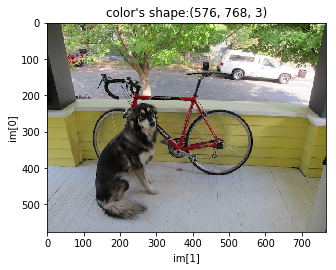

In [93]:
# color image
_filepath = str(img_dir_Path / "color" / "dog.jpg")
im = cv2.imread(filename=_filepath, flags=cv2.IMREAD_COLOR)
assert im is not None, "Could not open or find the image : {}".format(_filepath)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  # opencv -> matplot (bgr -> rgb)

# cv2.IMREAD_COLOR, cv2.IMREAD_GRAYSCALE はただの整数でありopencvでは整数でflagsを指定することがよくある,ということを頭に入れておくこと
print("cv2.IMREAD_COLOR           : {}".format(cv2.IMREAD_COLOR))
print("cv2.IMREAD_GRAYSCALE       : {}".format(cv2.IMREAD_GRAYSCALE))
print("type(cv2.IMREAD_COLOR)     : {}".format(type(cv2.IMREAD_COLOR)))
print("type(cv2.IMREAD_GRAYSCALE) : {}".format(type(cv2.IMREAD_GRAYSCALE)))

_im = im
print("_im.dtype : {}".format(_im.dtype))
_h, _w, _c = im.shape
print("_im.shape : {}".format(_im.shape))
print("-------------------------------\n" +
      "| Height  | Width   | Channel |\n" +
      "| {:7} | {:7} | {:7} |\n".format(_h, _w, _c) +
      "-------------------------------")

#===============================================================================
# Plot
plot_array_tuple = (
    # (name, im, cmap),
    ("color", _im, None),
)
nrows, ncols, idx = 1, 1, 0
fig = plt.figure(figsize=(ncols*5, nrows*5))
#=======================================
plot_template(plot_array_tuple, nrows, ncols, idx, fig)

### GRAY

cv2.IMREAD_GRAYSCALE       : 0
type(cv2.IMREAD_GRAYSCALE) : <class 'int'>
_im.dtype : uint8
_im.shape : (256, 256)
---------------------
| Height  | Width   |
|     256 |     256 |
---------------------


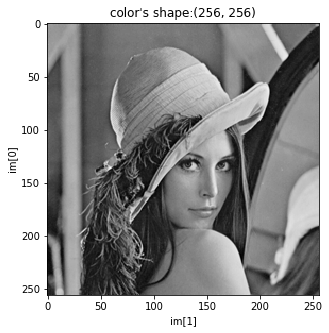

In [92]:
# grayscale image
_filepath = str(img_dir_Path / "mono" / "LENNA.bmp")
im = cv2.imread(filename=_filepath, flags=cv2.IMREAD_GRAYSCALE)
assert im is not None, "Could not open or find the image : {}".format(_filepath)

# cv2.IMREAD_GRAYSCALE はただの整数でありopencvでは整数でflagsを指定することがよくある,ということを頭に入れておくこと
print("cv2.IMREAD_GRAYSCALE       : {}".format(cv2.IMREAD_GRAYSCALE))
print("type(cv2.IMREAD_GRAYSCALE) : {}".format(type(cv2.IMREAD_GRAYSCALE)))

_im = im
print("_im.dtype : {}".format(_im.dtype))
_h, _w, *_c = im.shape
print("_im.shape : {}".format(_im.shape))
print("---------------------\n" +
      "| Height  | Width   |\n" +
      "| {:7} | {:7} |\n".format(_h, _w) +
      "---------------------")

#===============================================================================
# Plot
plot_array_tuple = (
    # (name, im, cmap),
    ("color", _im, "gray"),
)
nrows, ncols, idx = 1, 1, 0
fig = plt.figure(figsize=(ncols*5, nrows*5))
#=======================================
plot_template(plot_array_tuple, nrows, ncols, idx, fig)

## Resize

### Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ

- https://github.com/ayooshkathuria/pytorch-yolo-v3/blob/master/preprocess.py#L15-L27
- https://github.com/ayooshkathuria/pytorch-yolo-v3/blob/fbb4ef98d5a598f4c8eded6d618a599b7d289e2f/preprocess.py#L15-L27

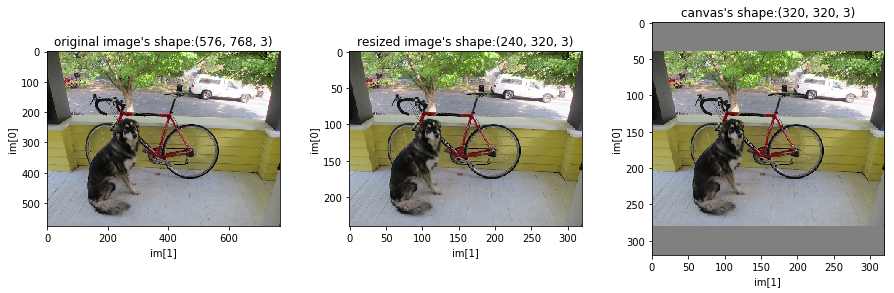

In [88]:
#===========================================================
#=======================================
# Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ
_filepath = str(img_dir_Path / "color" / "dog.jpg")
im = cv2.imread(filename=_filepath)
im = cv2.cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

im_h, im_w = im.shape[0], im.shape[1]
w, h = (320, 320)

new_w = int(im_w * min(w/im_w, h/im_h))
new_h = int(im_h * min(w/im_w, h/im_h))

resized_image = cv2.resize(im, (new_w,new_h), interpolation = cv2.INTER_CUBIC)

#=======================================
# 枠内の空いたスペースをRGB=(128,128,128)で埋める
canvas = np.full((w, h, 3), 128)
canvas[(h-new_h)//2:(h-new_h)//2 + new_h,(w-new_w)//2:(w-new_w)//2 + new_w,  :] = resized_image

#===============================================================================
# Plot
plot_array_dict = collections.OrderedDict((
    ("original image", im),
    ("resized image", resized_image),
    ("canvas", canvas),
))
nrows, ncols, idx = 1, 3, 0
fig = plt.figure(figsize=(ncols*5,nrows*5))
#=======================================
for (key, _im) in plot_array_dict.items():
    idx += 1
    ax = fig.add_subplot(nrows, ncols, idx)
    ax.imshow(_im, cmap="gray")
    ax.set_title(label="{}'s shape:{}".format(key, _im.shape))
    ax.set_xlabel(xlabel="im[1]")
    ax.set_ylabel(ylabel="im[0]")
#=======================================
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## END